In [1]:
# Introduction to Econometrics with statsmodels
# ============================================

# Table of Contents:
# 1. Setup and Data Loading
# 2. Data Preparation
# 3. Simple Linear Regression
# 4. Understanding Model Results
# 5. Visualization


In [2]:
# Environment Setup
# -----------------
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from statsmodels.formula.api import ols

# Set plotting style
plt.style.use('seaborn-v0_8')
sns.set_palette("deep")

In [3]:
data_path = "../../datasets/poe5csv/food.csv"
# 1. Load the data
data = pd.read_csv(data_path)

In [4]:
# 2. Data Preparation
# ------------------
# Display basic information about the dataset
print("\nDataset Information:")
print("-------------------")
print(data.info())


Dataset Information:
-------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   food_exp  40 non-null     float64
 1   income    40 non-null     float64
dtypes: float64(2)
memory usage: 768.0 bytes
None


In [5]:
print("\nFirst few rows of the data:")
print("-------------------------")
print(data.head())


First few rows of the data:
-------------------------
   food_exp  income
0    115.22    3.69
1    135.98    4.39
2    119.34    4.75
3    114.96    6.03
4    187.05   12.47


In [6]:
print("\nSummary Statistics:")
print("------------------")
print(data.describe())


Summary Statistics:
------------------
         food_exp     income
count   40.000000  40.000000
mean   283.573500  19.604750
std    112.675181   6.847773
min    109.710000   3.690000
25%    200.377500  17.110000
50%    264.480000  20.030000
75%    363.325000  24.397500
max    587.660000  33.400000


In [7]:
# 3. Simple Linear Regression
# --------------------------

- **Food expenditure as a function of income**

We'll estimate: $$\text{food_exp} = \beta_0 + \beta_1 \times \text{income} + \varepsilon$$

In [8]:
# Add constant term for intercept
X = sm.add_constant(data['income'])
y = data['food_exp']

In [9]:
# Fit the model
model = sm.OLS(y, X)
results = model.fit()

In [10]:
# 4. Understanding Model Results
# ----------------------------
print("\nRegression Results:")
print("------------------")
print(results.summary())


Regression Results:
------------------
                            OLS Regression Results                            
Dep. Variable:               food_exp   R-squared:                       0.385
Model:                            OLS   Adj. R-squared:                  0.369
Method:                 Least Squares   F-statistic:                     23.79
Date:                Sun, 23 Feb 2025   Prob (F-statistic):           1.95e-05
Time:                        19:49:08   Log-Likelihood:                -235.51
No. Observations:                  40   AIC:                             475.0
Df Residuals:                      38   BIC:                             478.4
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       

In [11]:
# Extract key statistics
r_squared = results.rsquared
adj_r_squared = results.rsquared_adj
f_stat = results.fvalue
f_pvalue = results.f_pvalue
params = results.params
std_errors = results.bse
t_stats = results.tvalues
p_values = results.pvalues

# Print key findings
print("\nKey Findings:")
print("-------------")
print(f"R-squared: {r_squared:.4f}")
print(f"Adjusted R-squared: {adj_r_squared:.4f}")
print(f"F-statistic: {f_stat:.4f}")
print(f"F-statistic p-value: {f_pvalue:.4f}")
print("\nCoefficients:")
print(f"Intercept (β₀): {params.iloc[0]:.4f}")
print(f"Income coefficient (β₁): {params.iloc[1]:.4f}")


Key Findings:
-------------
R-squared: 0.3850
Adjusted R-squared: 0.3688
F-statistic: 23.7888
F-statistic p-value: 0.0000

Coefficients:
Intercept (β₀): 83.4160
Income coefficient (β₁): 10.2096


In [17]:
results.predict()

array([121.08958457, 128.23633465, 131.91180612, 144.98014912,
       210.73024983, 215.93716775, 228.39293217, 234.11033223,
       239.82773229, 250.75205027, 260.55330752, 264.84135756,
       266.47490044, 271.57972192, 272.80487908, 275.35728982,
       275.45938625, 277.80760413, 279.64533987, 286.89418638,
       288.93611497, 290.97804356, 291.38642928, 291.99900786,
       302.41284369, 313.33716166, 313.64345095, 316.80844027,
       330.48936185, 332.42919401, 332.7354833 , 340.69900482,
       343.76189771, 355.0946014 , 356.01346927, 360.50571218,
       360.70990503, 375.61598377, 383.57950528, 424.41807716])

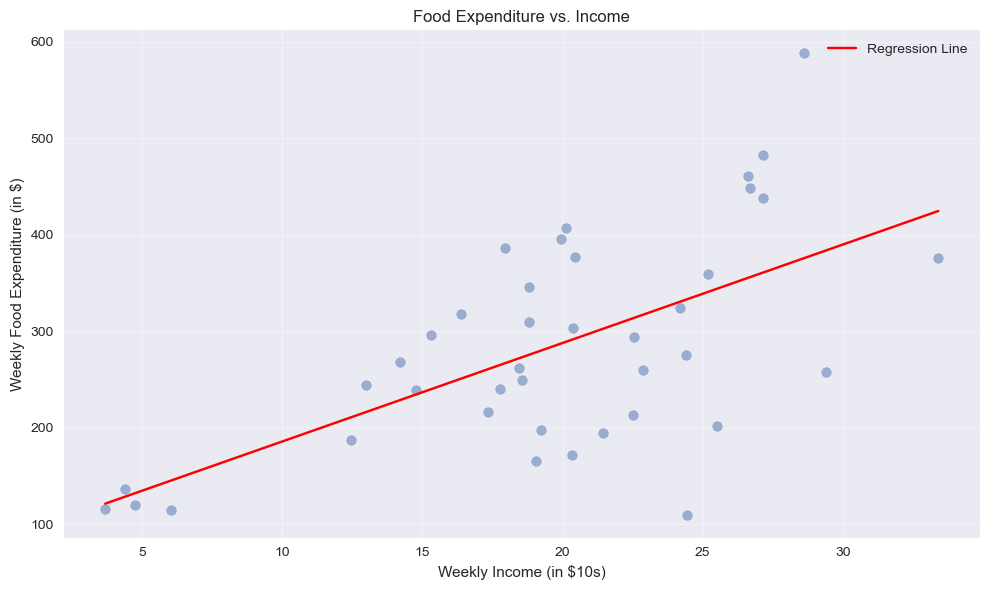

In [12]:
# 5. Visualization
# ---------------
plt.figure(figsize=(10, 6))
plt.scatter(data['income'],
            data['food_exp'],
            alpha=0.5)

plt.plot(data['income'], 
         results.predict(),
         'r',
         label='Regression Line')

plt.xlabel('Weekly Income (in $10s)')
plt.ylabel('Weekly Food Expenditure (in $)')
plt.title('Food Expenditure vs. Income')

plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()

plt.show()

In [13]:
# Create a publication-quality regression table
from statsmodels.iolib.summary2 import summary_col

# Create a regression table
reg_table = summary_col([results],
                       model_names=['Food Expenditure'],
                       stars=True,
                       float_format='%0.4f',
                       info_dict={
                           'N':lambda x: "{0:d}".format(int(x.nobs)),
                           'R2':lambda x: "{:.4f}".format(x.rsquared),
                           'Adj R2':lambda x: "{:.4f}".format(x.rsquared_adj)
                       })

print("\nRegression Table:")
print("----------------")
print(reg_table)


Regression Table:
----------------

               Food Expenditure
-------------------------------
const          83.4160*        
               (43.4102)       
income         10.2096***      
               (2.0933)        
R-squared      0.3850          
R-squared Adj. 0.3688          
N              40              
R2             0.3850          
Adj R2         0.3688          
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01


In [14]:
# convert the table to latex code
print(reg_table.as_latex())

\begin{table}
\caption{}
\label{}
\begin{center}
\begin{tabular}{ll}
\hline
               & Food Expenditure  \\
\hline
const          & 83.4160*          \\
               & (43.4102)         \\
income         & 10.2096***        \\
               & (2.0933)          \\
R-squared      & 0.3850            \\
R-squared Adj. & 0.3688            \\
N              & 40                \\
R2             & 0.3850            \\
Adj R2         & 0.3688            \\
\hline
\end{tabular}
\end{center}
\end{table}
\bigskip
Standard errors in parentheses. \newline 
* p<.1, ** p<.05, ***p<.01


In [15]:
# convert the table to text 
print(reg_table.as_text())


               Food Expenditure
-------------------------------
const          83.4160*        
               (43.4102)       
income         10.2096***      
               (2.0933)        
R-squared      0.3850          
R-squared Adj. 0.3688          
N              40              
R2             0.3850          
Adj R2         0.3688          
Standard errors in parentheses.
* p<.1, ** p<.05, ***p<.01


In [16]:
# save the results as text file
with open('results.txt', 'w') as f:
    f.write(reg_table.as_text())